In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_3/nShot")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "n_shot",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["n_shot"] = trial["parameters"]["n_shot"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,n_shot
0,0.712838,0.758901,0.569088,1.323158,14.0,789.565952,2.0
1,0.785466,0.586422,0.639583,1.213695,15.0,784.106309,5.0
2,0.789062,0.573106,0.653646,1.144937,25.0,1245.758807,10.0
3,0.718646,0.750541,0.561937,1.424482,11.0,662.212307,1.0


In [3]:
g = all_trials.groupby("n_shot")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy",
]].mean()
g

,source_val_label_accuracy,target_val_label_accuracy
n_shot,,
1.0,0.718646,0.561937
2.0,0.712838,0.569088
5.0,0.785466,0.639583
10.0,0.789062,0.653646


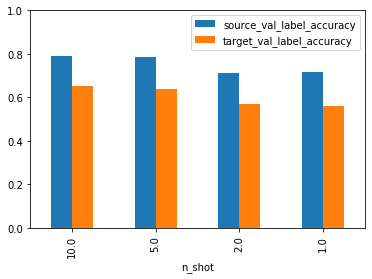

In [4]:
ax = all_trials.groupby("n_shot")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("n_shot", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)
ax